In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/sample_data/housing.csv')

In [11]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [12]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

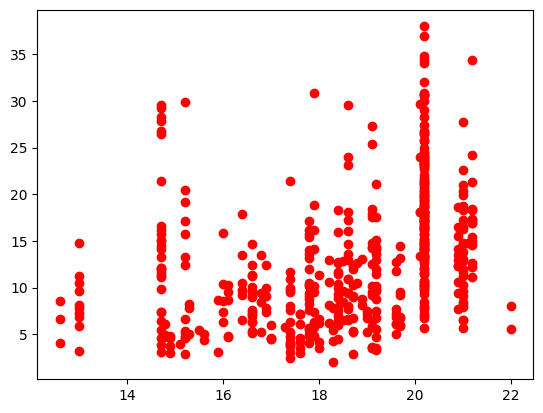

In [13]:
plt.scatter(df.PTRATIO,df.LSTAT,color='red')

<Axes: xlabel='LSTAT'>

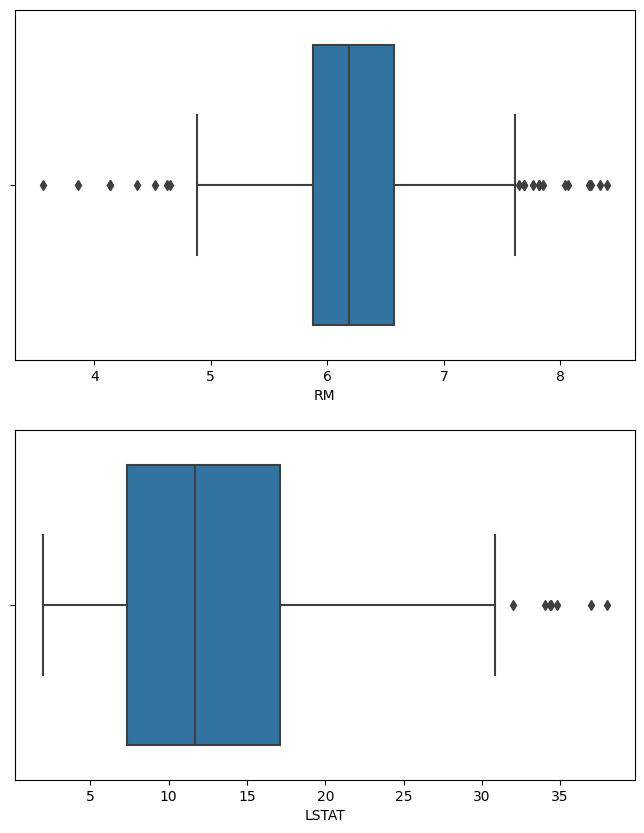

In [14]:

plt.figure(1, (8, 10))
plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='RM')
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='LSTAT')

In [15]:

Q1, Q3 = np.percentile(df['RM'], [25, 75])
print(f"Q1 is {Q1} || and Q3 is {Q3}")
IQR = Q3 - Q1
print(f"IQR is : {IQR}")
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(f"Lower Limit is {lower_limit} and Upper Limit is {upper_limit}")

Q1 is 5.88 || and Q3 is 6.575
IQR is : 0.6950000000000003
Lower Limit is 4.8374999999999995 and Upper Limit is 7.617500000000001


In [16]:
outliers_rm = [outlier for outlier in df['RM'] if outlier > upper_limit or outlier < lower_limit]
print(f"Outliers in RM column are {outliers_rm}")

Outliers in RM column are [8.069, 7.82, 7.765, 7.853, 8.266, 8.04, 7.686, 8.337, 8.247, 8.259, 8.398, 7.691, 7.82, 7.645, 3.561, 3.863, 4.138, 4.368, 4.652, 4.138, 4.628, 4.519]


In [17]:


df['rm'] = np.where(df['RM'] > upper_limit, upper_limit, np.where(df['RM'] < lower_limit, lower_limit, df['RM']))

In [18]:

Q1, Q3 = np.percentile(df['LSTAT'], [25, 75])
print(f"Q1 is {Q1} || and Q3 is {Q3}")
IQR = Q3 - Q1
print(f"IQR is : {IQR}")
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(f"Lower Limit is {lower_limit} and Upper Limit is {upper_limit}")
     

Q1 is 7.37 || and Q3 is 17.12
IQR is : 9.75
Lower Limit is -7.255 and Upper Limit is 31.745


In [19]:

outliers_rm = [outlier for outlier in df['LSTAT'] if outlier > upper_limit or outlier < lower_limit]
print(f"Outliers in lstat column are {outliers_rm}")


Outliers in lstat column are [34.41, 34.77, 37.97, 31.99, 34.37, 36.98, 34.02]


In [20]:

df['LSTAT'] = np.where(df['LSTAT'] > upper_limit, upper_limit, np.where(df['LSTAT'] < lower_limit, lower_limit, df['LSTAT']))

In [21]:

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns=['LSTAT', 'RM'])
y = df['MEDV']

In [22]:


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [23]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [24]:
from sklearn.linear_model import LinearRegression
     


     

In [25]:
lr = LinearRegression()
     



In [26]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:

prediction = lr.predict(x_test)

In [28]:

prediction
     

array([329457.07790506, 377665.11775584, 512672.09339639, 563215.5110049 ,
       417441.77573763, 537340.0921728 , 422848.60598834, 412253.01453667,
       667097.29538582, 621376.86932148, 562613.47314671, 568978.07789451,
       645187.48097263, 271078.23461413, 607169.79518112, 472195.74751688,
       587025.25220786, 289471.74248705, 494600.28322822, 569773.82385464,
       430858.67017282, 597742.76305652, 259505.82199709, 485259.02417272,
       472599.74796373, 489399.2785595 , 157047.44225945, 355657.64183734,
       356412.92362595, 428863.30379343, 550068.06472286, 107787.32221135,
       688914.27008819, 469857.89586806, 463485.61747154, 352062.7548574 ,
       632267.28924161, 534044.84399002, 379673.48352928, 329727.14453099,
       199224.20006218, 472442.42669932, 566200.33144637, 614893.68951597,
       468575.46875585, 346617.53343155, 732613.57149468, 580798.04014219,
       425843.20747226, 390435.67333696, 321675.49375135, 476486.76047719,
       465050.49213095, 4

In [29]:

predictionDec = {"y_test":y_test, "prediction":prediction}
predictionData = pd.DataFrame(predictionDec)
predictionData
     

,y_test,prediction
237,388500.0,329457.077905
440,283500.0,377665.117756
75,449400.0,512672.093396
230,497700.0,563215.511005
351,436800.0,417441.775738
...,...,...
176,835800.0,656941.965231
466,457800.0,448530.694682
122,430500.0,366783.734418
401,184800.0,331082.975257
